##  Fashion MNIST with CNN

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import visualkeras
from keras.optimizers import RMSprop,Adam
import warnings
warnings.filterwarnings("ignore")



### Loading and Spliting data into train and test set

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df = np.asarray(train_df)
test_df = np.asarray(test_df)

In [4]:
X_train = train_df[:,1:785]
y_train = train_df[:, 0]

X_test = test_df[:, 1:785]
y_test = test_df[:, 0]

In [5]:
X_train.shape , y_train.shape

((60000, 784), (60000,))

In [6]:
X_test.shape , y_test.shape

((10000, 784), (10000,))

### Change Dimensions (padding)

In [7]:
# 2 dimension image
X_train.ndim 

2

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [10]:
# 4 Dimension image
X_train.ndim 

4

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

### Feature Scaling(normalize data)

In [13]:
X_train = X_train/255
X_test = X_test/255

### Spliting Dataset for validation set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 2020)

In [15]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [16]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

### Model CNN

![model](model.png)

In [17]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

## Plotting The neural Network Work flow

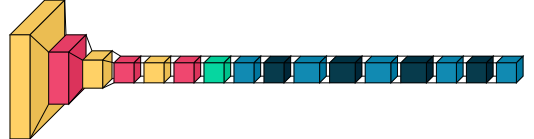

In [18]:
visualkeras.layered_view(model)

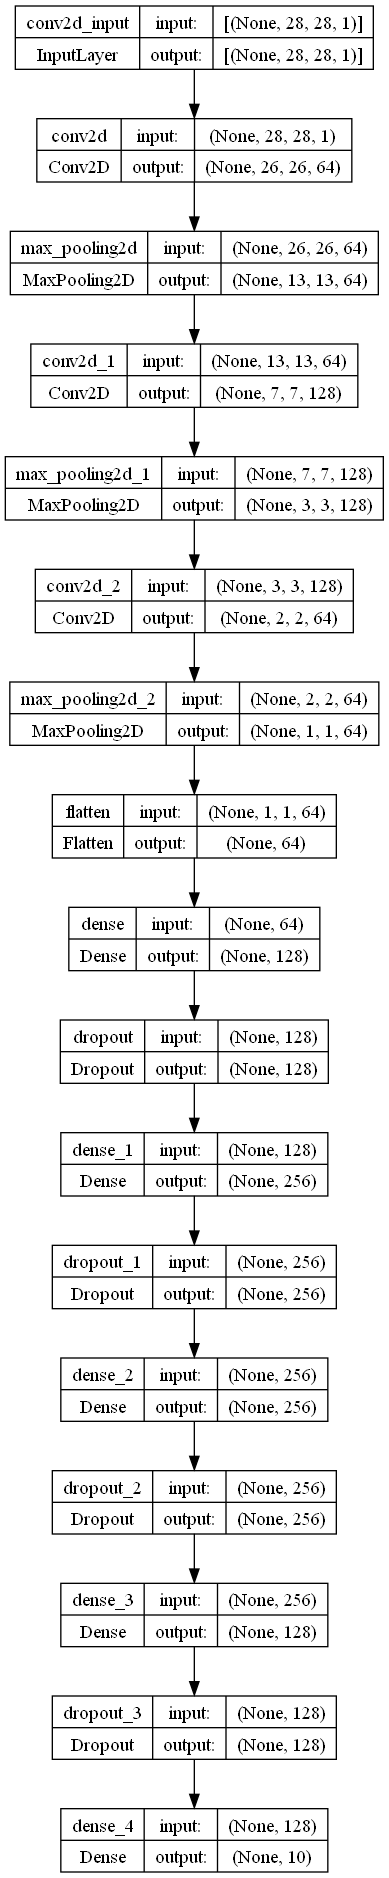

In [19]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

### Compile and Model Fitting

In [21]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs = 10,batch_size = 512,verbose = 1, validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 16s 155ms/step - loss: 1.1797 - accuracy: 0.5488 - val_loss: 0.5950 - val_accuracy: 0.7635
Epoch 2/10
94/94 [==============================] - 14s 150ms/step - loss: 0.5871 - accuracy: 0.7796 - val_loss: 0.4732 - val_accuracy: 0.8188
Epoch 3/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4791 - accuracy: 0.8245 - val_loss: 0.4111 - val_accuracy: 0.8437
Epoch 4/10
94/94 [==============================] - 15s 160ms/step - loss: 0.4196 - accuracy: 0.8494 - val_loss: 0.3651 - val_accuracy: 0.8662
Epoch 5/10
94/94 [==============================] - 15s 155ms/step - loss: 0.3700 - accuracy: 0.8684 - val_loss: 0.3329 - val_accuracy: 0.8770
Epoch 6/10
94/94 [==============================] - 14s 154ms/step - loss: 0.3379 - accuracy: 0.8809 - val_loss: 0.3019 - val_accuracy: 0.8927
Epoch 7/10
94/94 [==============================] - 15s 158ms/step - loss: 0.3128 - accuracy: 0.8887 - val_loss: 0.2901 - val_accuracy: 0.8966

Text(0.5, 1.0, 'Training and validation loss')

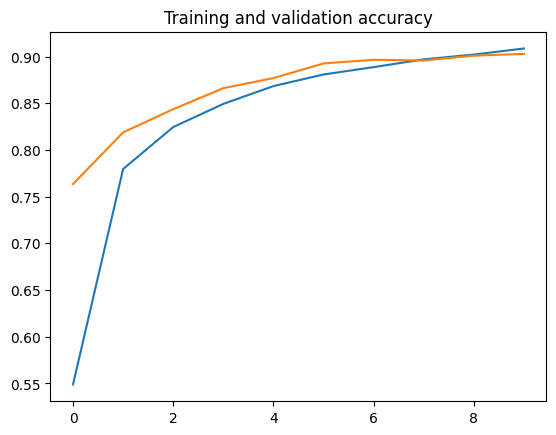

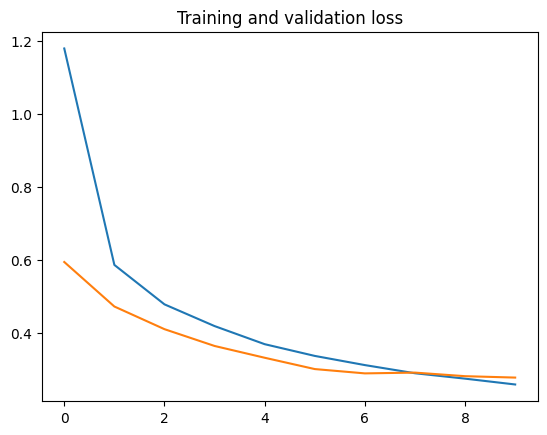

In [24]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

### Testing the Model

In [25]:
# np.expand is used to change the 3 dimension data into 4 dimension
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 102ms/step


array([[0.71, 0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[0.71, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.9 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 0.94, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

### Evaluation

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2736 - accuracy: 0.9006


[0.2736048400402069, 0.900600016117096]

### Confusion Matrix

<Axes: >

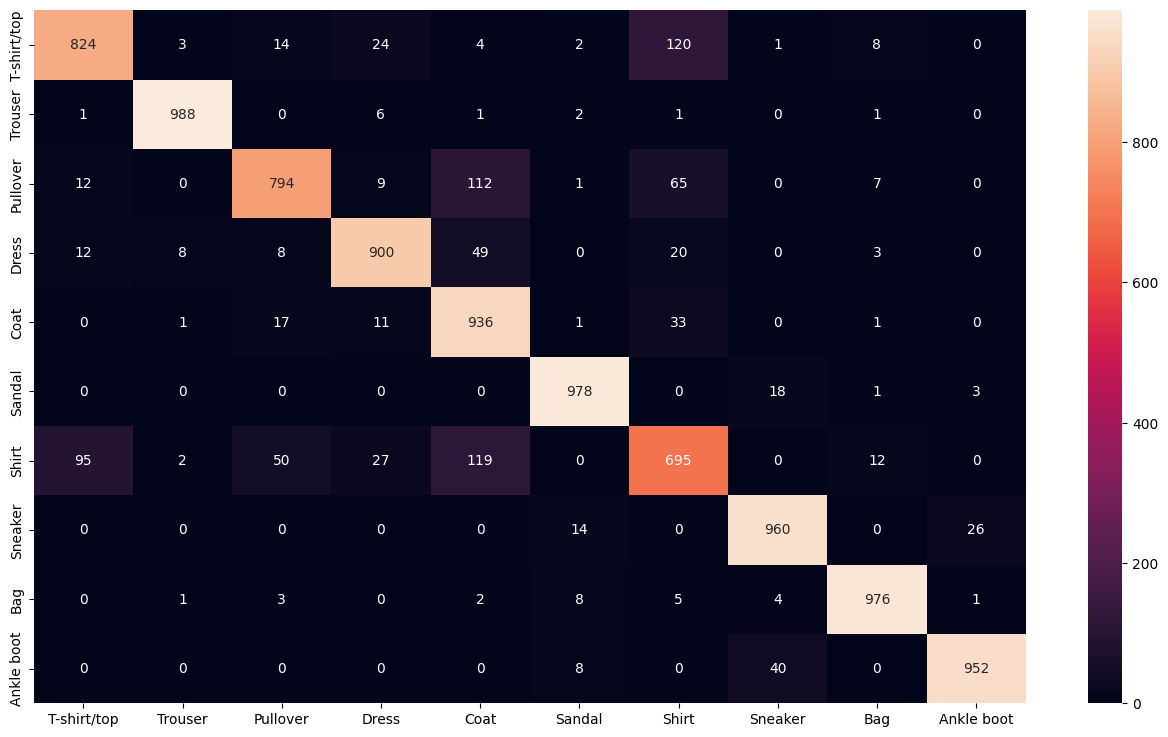

In [28]:
from sklearn.metrics import confusion_matrix
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)